# Advanced 2D plotting

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

### Let's see some plots before we start making good ones:

### Why is this a VERY bad plot?

<img src="badplot.png" width=550 height=550 />
source:Spring 2019 lectures

### why is this a better, but still bad plot?

<img src="badplot2.png" width=550 height=550 />

### Let's see these bad plots:

<img src="badplot3.png" width=550 height=550 />

<img src="badplot4.png" width=550 height=550 />

### what is wrong with this one?
<img src="badplot5.png" width=550 height=550 />

### the better plot:
<img src="betterplot6.png" width=550 height=550 />

In [3]:
##############

### What makes a plot a good one?

- Titles ( at the right BIG size)

- Appropriate contrast for lines

- Labels and legends if needed ( at the right BIG size)

- Proper fitting of data! 


### Scatter plots and intro to fitting of data

<img src="betterplot7.png" width=550 height=550 />

Souce: https://infogram.com/blog/scatter-plots/


## ----------------------------------------------------------------------------------------------------
### Intermezzo: Correlations 

### When looking at a scatter plot you may find that the x and y parameters are correlated, anti-correlated or not correlated. What does that tell you?

<img src="betterplot8.png" width=750 height=550 />

Souce: https://infogram.com/blog/scatter-plots/

### Of course, sometimes this can be a slippery slope...

### How would you interpret this?

<img src="correlation_causation.png" width=450 height=550 />
Source: https://www.centerforhealthjournalism.org/fellowships/projects/one-worst-state-merced-county-s-childhood-obesity-crisis/


### What about this one then?
<img src="correlation_causation2.png" width=750 height=550 />

# Correlation != Causation  !!!!
## ----------------------------------------------------------------------------------------------------


### Let's do some proper plotting

### Get data for Old Faithful erruptions in *old_faithful_data.dat* 

In [4]:
olf_errupt = np.genfromtxt( 'old_faithful_data.dat', comments= '#' )

### Start with doing a scatter plot with plt:

In [5]:
#let's define our plotting area:



### Now let's try the same thing using the ax :

### The ax plotting:
--------------------------------
### If you want to add more flexibility to your plots, and start making more advanced/ multiple plots you can do more object-oriented plots using the 'ax' 

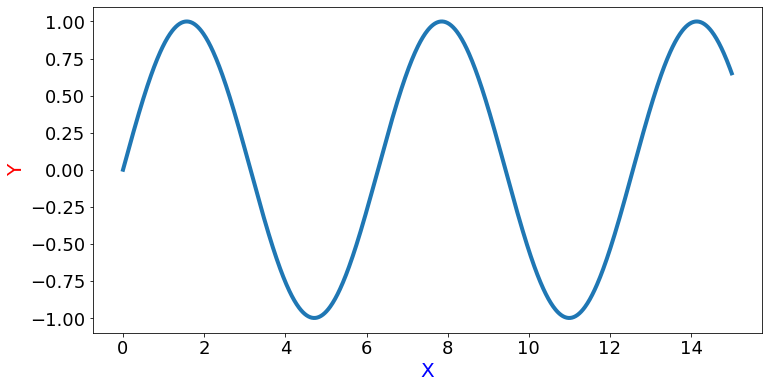

In [6]:
#let's make a basic plot of x vs y for this random sinusoidal data:
x = np.linspace( 0, 15, 1000 )
y = np.sin( x )


fig, ax = plt.subplots( figsize = (12, 6) )  # create a figure object

ax.plot( x, y , linewidth = 4)                     #make the plot 
ax.set_ylabel( 'Y', color='red', fontsize=20 )    # add X and Y labels and make them red
ax.set_xlabel( 'X', color='blue', fontsize=20 )
ax.tick_params( axis="both", labelsize=18 )       # change the size of your tick labels


### this method offers you more flexibility than the plt--- for example, you can use double y axis in a plot:  (note: same principles for double x axis)


<ipython-input-7-b732dd2837bf>:13: RuntimeWarning: divide by zero encountered in true_divide
  ax2.plot( x, 1/x, color='red')


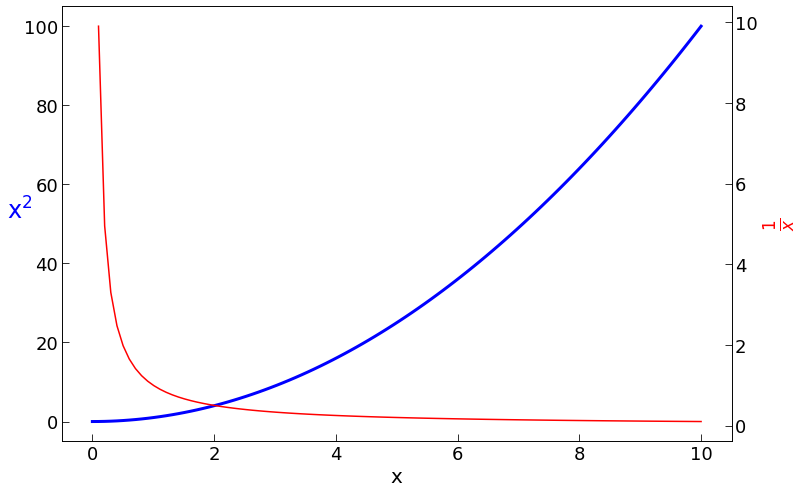

In [7]:

x = np.linspace(0., 10., 100)

fig = plt.figure( figsize = (12,8) )

ax1 = fig.add_subplot(1, 1, 1)
ax2 = ax1.twinx()

ax1.plot( x, x ** 2, color= 'blue' , linewidth = 3 )
ax1.set_ylabel( 'x$^2$', color='blue', fontsize=24, rotation = 0 )
ax1.set_xlabel('x',fontsize=20)
ax1.tick_params( axis="both", labelsize=18, length = 7 , direction = 'in' )

ax2.plot( x, 1/x, color='red')
ax2.set_ylabel('$ \\frac{1}{x} $', color='red',fontsize=24) #, rotation = 0)
ax2.tick_params( axis="y", labelsize=18 , length = 7 , direction = 'in' )



---------------

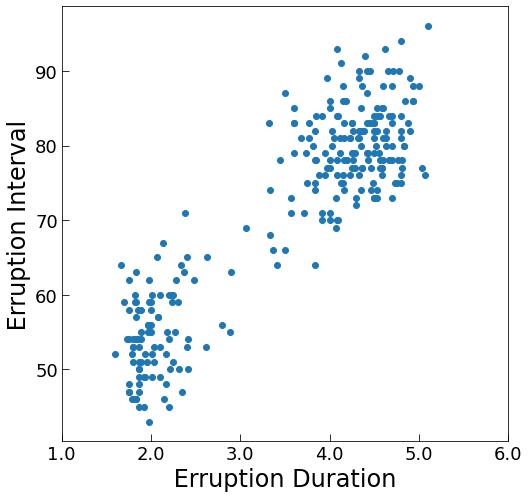

In [8]:
# Now let's go back to the Old Faithful data and make a scatter plot with ax:

# let Python know you start a fig with 1 'subplot' under 'ax' :
fig, ax = plt.subplots( figsize = ( 8, 8 ) )

ax.scatter( olf_errupt[ :, 1 ]  / 1000. , olf_errupt[ :, 2 ]  )

ax.set_xlabel( ' Erruption Duration ' , size = 24 )
ax.set_ylabel( ' Erruption Interval ' , size = 24 )

# change the fontsize of your tickmarks:

ax.set_xticks( np.arange( 1, 6.2, 1. ) )
ax.set_xticklabels( np.arange( 1, 6.2, 1. ), fontsize = 14)


# let's make our tickmars a bit clearer:

ax.tick_params( axis ='both', which ='both', length = 7 , direction = 'in' , labelsize=18)

### Let's get another dataset now. Try to make the scatter plot of *baseball_leads.dat* :


In [12]:
#read data in:
baseball = np.genfromtxt( )

TypeError: genfromtxt() missing 1 required positional argument: 'fname'

### let's start with the standard plt.scatter() plot:

### Now we want to split the data in the 'older' and modern times (assume split happens in 1960) and plot them stacked. How do we do that?

In [ ]:
year_lim =  np.where( baseball[ :, 1 ] == 1960. )[0]
year_lim = int( year_lim )

In [ ]:
fig, ( ax1, ax2 ) = plt.subplots(2, figsize = (10, 10 ))

fig.suptitle('Vertically stacked scatter plots - baseball' , fontsize = 24 )

#start with the first one:

ax1.scatter( baseball[ :year_lim , 1 ] , baseball[ :year_lim , 2] *1e-3 )
ax1.set_xlabel( ' Year ' , fontsize = 24 )
ax1.set_ylabel( ' Lead Avg ' , fontsize = 24 )

#you can define what your tickmarks will be via the set_xticks (or y) and _xticklabels

ax1.set_xticks( 1900 + np.arange( 4 ) * 20 )
ax1.set_xticklabels( 1900 + np.arange( 4 ) * 20 , fontsize = 14 )
ax1.tick_params( axis ='both', which ='both', length = 7 , direction = 'in' , labelsize=14 )

# go to the second one:

ax2.scatter( baseball[ year_lim:, 1 ] , baseball[ year_lim:, 2] *1e-3 , color = 'red' ) 
ax2.set_xlabel( ' Year ' , fontsize = 24 )
ax2.set_ylabel( ' Lead Avg ' , fontsize = 24 )
ax2.set_xticks( 1960 + np.arange( 4 ) * 20  ) 
ax2.set_yticks( 0.33 + np.arange( 4) * 0.02) 

# or just make them the same like so: 
ax2.tick_params( axis ='both', which ='both', length = 7 , direction = 'in' , labelsize=14 )


### or if you prefer them side by side:

In [ ]:
fig, ( ax1, ax2 ) = plt.subplots( 1, 2 , figsize = (16, 8 ))

fig.suptitle('Horizontally stacked scatter plots', fontsize = 24)

#start with the first one:

ax1.scatter( baseball[ :year_lim , 1 ] , baseball[ :year_lim , 2] *1e-3 )
ax1.set_xlabel( ' Year ' , fontsize = 24 )
ax1.set_ylabel( ' Lead Avg ' , fontsize = 24 )
ax1.set_xticks( 1900 + np.arange( 4 ) * 20 )
ax1.set_xticklabels( 1900 + np.arange( 4 ) * 20 , fontsize = 14 )
ax1.tick_params( axis ='both', which ='both', length = 7 , direction = 'in' , labelsize=14 )

ax1.tick_params( axis ='both', which ='both', length = 7 , direction = 'in', labelsize=18 )

# go to the second one:

ax2.scatter( baseball[ year_lim:, 1 ] , baseball[ year_lim:, 2] *1e-3 , color = 'red' ) 
ax2.set_xlabel( ' Year ' , fontsize = 24 )
ax2.set_ylabel( ' Lead Avg ' , fontsize = 24 )
ax2.set_xticks( 1960 + np.arange( 4 ) * 20  ) 
ax2.set_yticks( 0.33 + np.arange( 4) * 0.02) 

ax2.tick_params( axis ='both', which ='both', length = 7 , direction = 'in', labelsize=18 )


In [ ]:
# of course, the sky is the limit...the lower limit:

fig, ( (ax1, ax2), (ax3, ax4) ) = plt.subplots( 2, 2 , figsize = (16, 16 ) )


ax1.scatter( olf_errupt[ :, 1 ]  / 1000. , olf_errupt[ :, 2 ]  )
ax1.set_xlabel( ' Erruption Duration ' , fontsize = 24 )
ax1.set_ylabel( ' Erruption Interval ' , fontsize = 24 )
ax1.set_xticks( np.arange( 1, 6.2, 1. ) )
ax1.set_xticklabels( np.arange( 1, 6.2, 1. ), fontsize = 14 )
ax1.tick_params( axis ='both', which ='both', length = 7 , direction = 'in' )

# go to the second one:

ax2.scatter( baseball[ :, 1 ] , baseball[ :, 2] *1e-3 , color = 'red' ) 
ax2.set_xlabel( ' Year ' , fontsize = 24 )
ax2.set_ylabel( ' Lead Avg ' , fontsize = 24 ) 
ax2.tick_params( axis ='both', which ='both', length = 7 , direction = 'in' , labelsize = 16 )


ax3.plot( np.arange( 10 ) , np.arange( 10 )**2, color = 'green', linestyle = '--' , linewidth = 4 )
ax3.tick_params( axis ='both', which ='both', length = 7 , direction = 'in' , labelsize = 16 )
ax3.set_xlabel( 'Random X ' , fontsize = 24 )
ax3.set_ylabel( 'X $^2$ ' , fontsize = 24 )

ax4.plot( np.arange( 10 ) , np.arange( 10 )**0.5, color = 'magenta', linestyle = '-.' , linewidth = 7 )
ax4.tick_params( axis ='both', which ='both', length = 7 , direction = 'in' , labelsize = 16 )
ax4.set_xlabel( 'Random X ' , fontsize = 24 )
ax4.set_ylabel( '$\\sqrt{X}$ ' , fontsize = 24 )


### Sometimes you may need to do a contour plot or use colorbars:


In [ ]:
# examples from https://matplotlib.org/ 
#random image to see addition of colorbar:

image = np.random.poisson( 10., ( 120, 100 ) )

fig, ax = plt.subplots( figsize = (8,8) )

i    = ax.imshow( image, interpolation = 'nearest', cmap='RdYlBu' )

ax.set_xlabel( 'X' , fontsize = 24 )
ax.set_ylabel( 'Y' , fontsize = 24 )
ax.tick_params( axis="both", labelsize=20 ) 
ax.tick_params( axis ='both', which ='both', length = 7 , direction = 'in', width = 4  )


cbar = fig.colorbar( i )

cbar.set_label('random noise',fontsize = 20 )
cbar.ax.tick_params(labelsize = 20)

In [ ]:
# or do a contour plot:


delta = 0.025

x    = np.arange( -5, 5, 0.1 )
y    = np.arange( -5.0, 5.0, delta )
xx, yy = np.meshgrid( x, y , sparse=True )

z = np.sin( xx**2 + yy**2 ) / ( xx**2 + yy**2 )

plt.figure( figsize = (12, 8 ) )
plt.contourf( x, y, z ,  cmap='Reds'  )
plt.xticks( fontsize = 20 )
plt.yticks( fontsize = 20 )


In [ ]:
# or an alternative version:

#import matplotlib.colors as colors

fig, ax = plt.subplots(1, 1, figsize=(18, 10))
#ax = ax.flatten()
bounds = np.linspace( np.min( z ) , np.max( z ) + .1, 100)
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)
pcm = ax.contourf(x, y ,z ,100, cmap='RdYlBu')

cbar = fig.colorbar( pcm )

cbar.set_label('random contour',fontsize = 20 )
cbar.ax.tick_params(labelsize = 20)

ax.tick_params( axis ='both', which ='both', length = 7 , direction = 'in', width = 3 )
ax.set_xticklabels( -6. + np.arange( 6 ) *2, fontsize = 20)
ax.set_yticklabels( -6. + np.arange( 6 ) *2, fontsize = 20)

In [ ]:
# or :


delta = 0.025
x = np.arange( -3.0, 3.0, delta )
y = np.arange( -2.0, 2.0, delta )
X, Y = np.meshgrid(x, y)

Z1 = np.exp(-X**2 - Y**2)
Z2 = np.exp(-(X - 1)**2 - (Y - 1)**2)
Z  = (Z1 - Z2) * 2

fig, ax = plt.subplots( figsize = ( 12, 8 ) )

CS = ax.contour( X, Y, Z )
ax.clabel( CS, inline=1, fontsize=12 )
ax.set_title( 'Simplest default with labels' , fontsize = 20 )

ax.set_xlabel( 'X' , fontsize = 24 )
ax.set_ylabel( 'Y' , fontsize = 24 )
ax.tick_params( axis="both", labelsize=20 ) 
ax.tick_params( axis ='both', which ='both', length = 7 , direction = 'in' )


In [ ]:
# you can also manually define the properties of your lines:
fig, ax = plt.subplots( figsize = ( 12, 8 ) )

CS = ax.contour( X, Y, Z, 6,
                linewidths = np.arange(1, 7, 1),
                colors = ('red', 'green', 'blue', 'orange', 'magenta', 'gray'),
                )

ax.clabel( CS, fontsize = 14, inline = True )
ax.set_title( 'Crazy lines', fontsize = 24)

ax.set_xlabel( 'X' , fontsize = 24 )
ax.set_ylabel( 'Y' , fontsize = 24 )
ax.tick_params( axis="both", labelsize=20 ) 
ax.tick_params( axis ='both', which ='both', length = 7 , direction = 'in' )


In [ ]:
# sometimes you may need to crank up the accuracy for your reader...you need to see your grid lines and find out what is what...

# let's go back to this one and add a grid:
x = np.linspace( 0, 15, 1000 )
y = np.sin( x )


fig, ax = plt.subplots( figsize = (12, 6) )  # create a figure object

ax.plot( x,y , linewidth = 4)                   #make the plot 
ax.set_ylabel('Y', color='red', fontsize=20)    # add X and Y labels and make them red
ax.set_xlabel('X', color='red', fontsize=20)
ax.tick_params( axis="both", labelsize=18 )     # change the size of your tick labels

ax.grid( linestyle='--' )

# ---------------------------------------------------------------
# Colorblind friendly plots

<img src="ishiharas_test.png" width=550 height=250 />

source: https://www.color-blindness.com/ishiharas-test-for-colour-deficiency-38-plates-edition/

<img src="retinas.png" width=550 height=550 />

Souce:BenRG - Own work, Public Domain, https://commons.wikimedia.org/w/index.php?curid=7873848


<img src="colorblidness_states.png" width=550 height=550 />
source: By Nanobot - Own work, Public Domain,https://commons.wikimedia.org/w/index.php?curid=7905402


## How do you ensure that colorblind people can see your plots as they should be seen? 


#### community has created number of resources that you can use to plot colorblind-friendly plots; here I show just one from an old colleague

<img src="colorblind_friendly.png" width=550 height=550 />

source: https://personal.sron.nl/~pault/

In [ ]:
from tol_colors import tol_cset

In [ ]:
schemes = tol_cset()

fig, axes = plt.subplots(ncols=len(schemes))
fig.subplots_adjust(top=0.92, bottom=0.02, left=0.02, right=0.92)
for ax, scheme in zip(axes, schemes):
        cset = tol_cset(scheme)
        names = cset._fields
        colors = list(cset)
        for name, color in zip(names, colors):
            ax.scatter([], [], c=color, s=80, label=name)
        ax.set_axis_off()
        ax.legend(loc=2)
        ax.set_title(scheme)
plt.show()

In [ ]:
x = np.arange( 10 )
y = x ** 2.
z = x ** 0.5
w = x ** 1.5


clrs = tol_cset( colorset= 'bright' )

#add your plot here:
plt.figure( figsize =( 12, 7 ) )

plt.plot( x, y, linewidth =3 , color = clrs[0] )
plt.plot( x, z, linewidth =3 , color = clrs[3] )
plt.plot( x, w, linewidth =3 , color = clrs[5] )


#### -----------------------------------------------

#### Let's get some of Python's built-in datasets to do some plotting

In [ ]:
# import the datasets from the statsmodels:
from statsmodels import datasets

# list them all:
#dir(datasets)

In [ ]:
# now let's get, e.g., the elnino dataset and put it in a pandas series

import pandas as pd
data = pd.Series(datasets.elnino.load_pandas().data.set_index('YEAR').values.ravel())


In [ ]:
#try basic plot
plt.figure( figsize = ( 12 , 8 ) )
plt.plot( data, marker = 'o')

plt.xlabel( 'Years', fontsize = 20)
plt.ylabel( ' El ninio frequency', fontsize = 20 )

plt.xticks( fontsize = 20 )
plt.yticks( fontsize = 20 )

In [ ]:
# try it as an ax histogram:

fig, ax = plt.subplots( figsize=(12,8) )

ax.hist( data, bins = 50 )

ax.set_xlabel( 'Year', fontsize = 20 )
ax.set_ylabel( 'Frequency', fontsize = 20 )


In [ ]:
# let's get the sunspot data:

data2 = datasets.sunspots.load_pandas().data


In [ ]:
#check it out:
#print( data2 )

#data2.describe

In [ ]:
#let's plot it with an ax:

fig, ax = plt.subplots( figsize = (12, 6) )

ax.plot( data2.iloc[ :, 0], data2.iloc[ :, 1 ], linewidth = 2, color = 'magenta' )
ax.set_xlabel( 'Year', fontsize = 20 )
ax.set_ylabel( ' Num of spots', fontsize = 20 )

# let's make our tickmars a bit clearer:
ax.tick_params( axis ='both', which ='both', length = 12 , direction = 'in' , labelsize=19,  rotation=20 )


In [ ]:
# or you could plot it like:
past_data = data2.loc[(data2.iloc[:, 0 ] >= 1800) & (data2.iloc[:, 0 ] < 1950)]
past_spots = past_data['SUNACTIVITY']
past_years = past_data[ 'YEAR' ]

modern_data = data2.loc[(data2.iloc[:, 0 ] >= 1950)]
modern_spots = modern_data['SUNACTIVITY']
modern_years = modern_data[ 'YEAR' ]



In [ ]:
fig, ( ax1, ax2 ) = plt.subplots( 1, 2 , figsize = (16, 8 ))

ax1.plot( past_years, past_spots )
ax1.set_xlabel( ' Year ' , size = 24 )
ax1.set_ylabel( ' # of Sunspots ' , size = 24 )
ax1.set_xticks( np.arange( 1800, 1970, 50. ) )
ax1.set_xticklabels( np.arange( 1800, 1970, 50. ), fontsize = 14 )

ax2.plot( modern_years, modern_spots )
ax2.set_xlabel( ' Year ' , size = 24 )
ax2.set_ylabel( ' # of Sunspots ' , size = 24 )

ax2.set_xticklabels( np.arange( 1950, 2022, 11. ), fontsize = 14 )



In [ ]:
# now get the file first_data_read_plot.dat and plot with the ax method the two spectra in 2 different, stacked plots



In [ ]:
# assign columns to three variables


#plot:



In [ ]:
# and how do I put them next to each other?


### Get dataset whatsinthefile.dat and contour plot it:

In [ ]:
# read data in:



In [ ]:
# first with simple contour plot:

In [ ]:
# try with advanced plotting: